In [1]:
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

In [2]:
filename = "D:\Projects\DS_Fst_course\Prepareted_data\pima-indians-diabetes.csv"
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(filename,names=names)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

In [5]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In [10]:
set_option('display.precision', 3) # задаем количество знаков после запятой

In [11]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [13]:
data.skew() # находим ассиметрию данных по оси столбца

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64

In [16]:
data.kurtosis() # несмещенный эксцесс по оси - при нормальном распределении стремится к нулю

preg     0.159
plas     0.641
pres     5.180
skin    -0.520
test     7.214
mass     3.290
pedi     5.595
age      0.643
class   -1.601
dtype: float64

In [17]:
data.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [19]:
stats.pearsonr(data.preg,data.plas) # коэффициент корреляции Пирсона и значение р для проверки отсутствия корреляции

PearsonRResult(statistic=0.12945867149927248, pvalue=0.0003219491352041135)

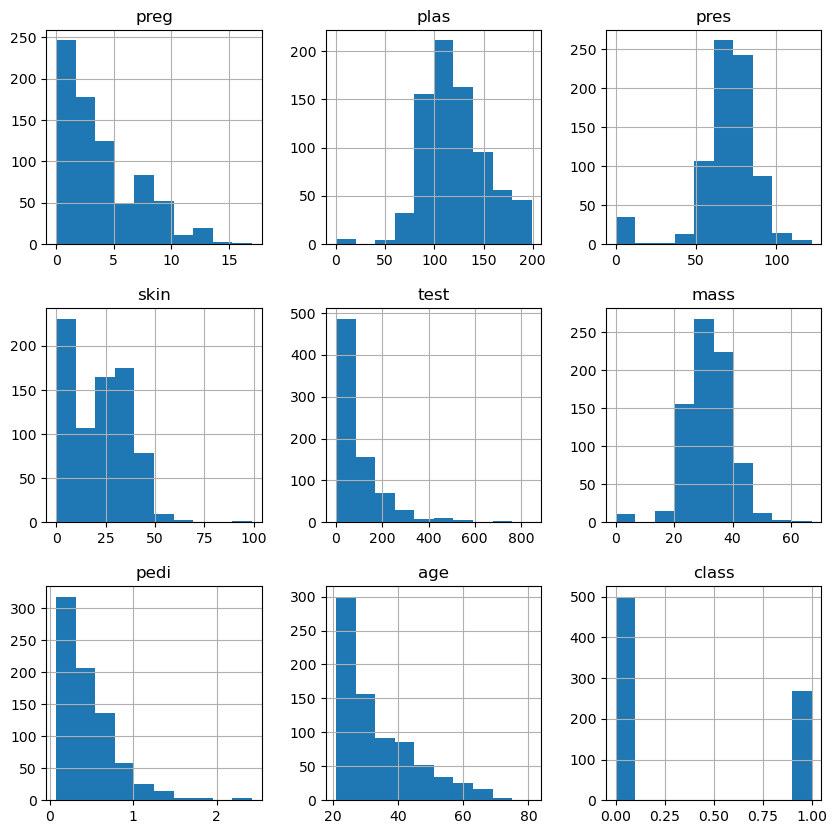

In [25]:
data.hist(figsize=(10,10)) # гистограммы
plt.show()

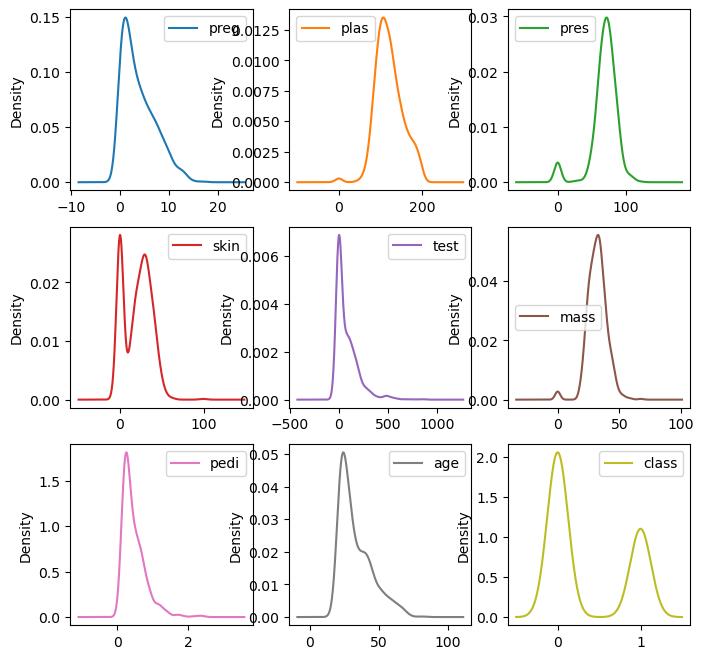

In [26]:
data.plot(kind='kde', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8)) # яжерная оценка плотности
plt.show()

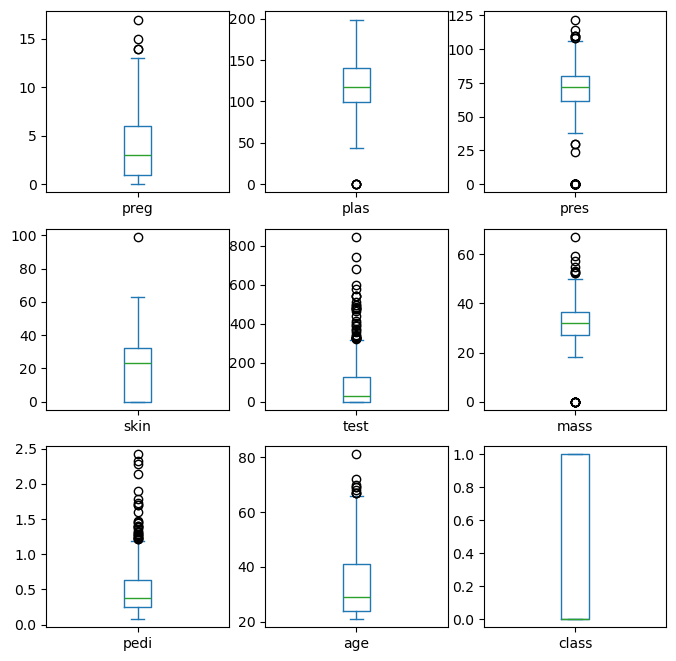

In [27]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8)) # Ящик с усами - classic
plt.show()

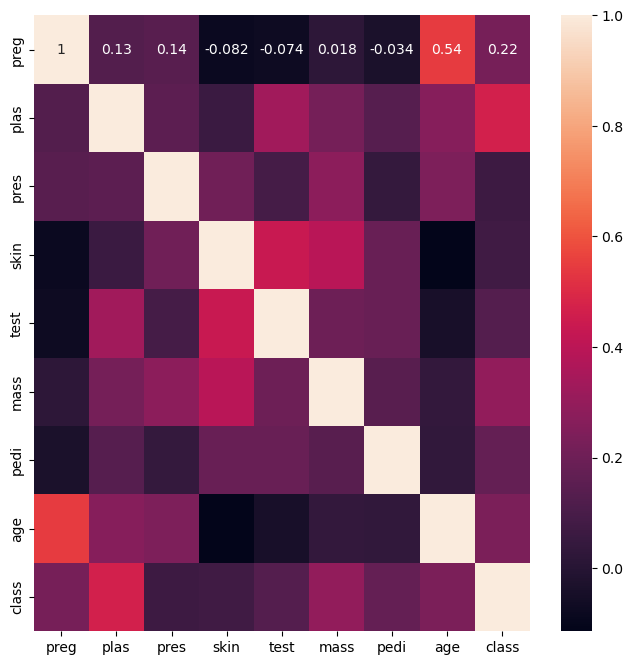

In [28]:
fig=plt.figure(figsize=(8,8)) # тепловая карта
sns.heatmap(data.corr(), annot = True)
plt.show()

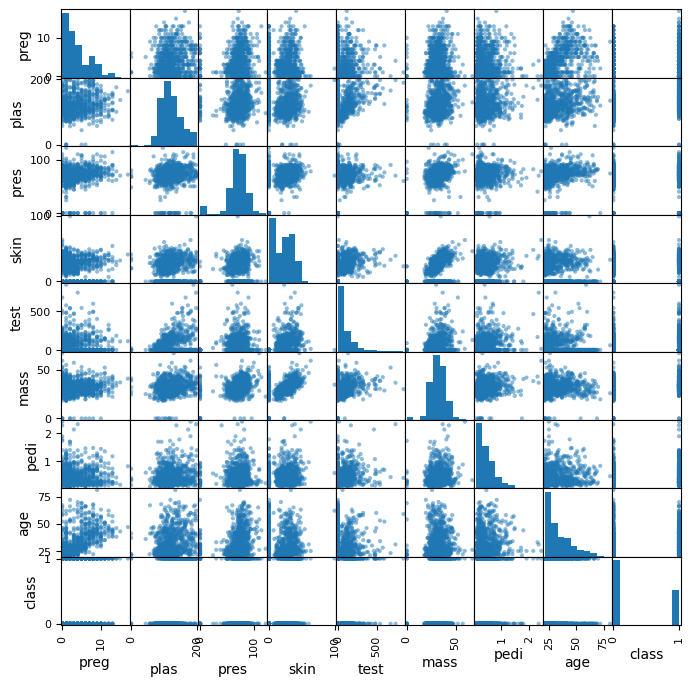

In [29]:
scatter_matrix(data, figsize=(8,8)) # матрица рассеяния
plt.show()